<ipython-input-6-66b49a654dd1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = x_query @ theta  # Predict for x_query


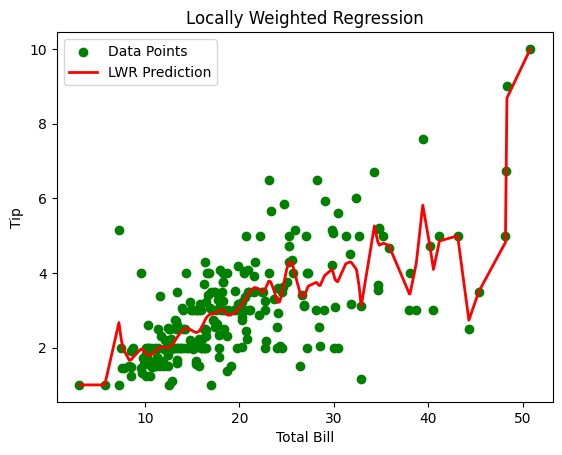

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load or generate dataset
try:
    df = pd.read_csv('cleaned_tips.csv')
except FileNotFoundError:
    df = sns.load_dataset('tips')
    df.to_csv('tips.csv', index=False)

# Extract features and labels
features = np.array(df['total_bill'])
labels = np.array(df['tip'])

# Define the locally weighted regression function
def local_weight_regression(X, y, tau):
    """
    Perform locally weighted regression.

    Parameters:
        X (np.ndarray): Input data with bias term of shape (m, 2).
        y (np.ndarray): Target labels of shape (m, 1).
        tau (float): Bandwidth parameter for the Gaussian kernel.

    Returns:
        np.ndarray: Predicted values for the input data.
    """
    m, _ = X.shape
    y_pred = np.zeros(m)

    for i in range(m):
        # Compute weights for point i
        x_query = X[i]

        distances = np.linalg.norm(X - x_query, axis=1)  # Euclidean distance
        weights = np.exp(-distances ** 2 / (2 * tau ** 2))  # Gaussian kernel
        W = np.diag(weights)  # Diagonal weight matrix

        # Solve weighted normal equation: theta = (X^T W X)^(-1) X^T W y
        theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y)
        y_pred[i] = x_query @ theta  # Predict for x_query

    return y_pred

# Prepare data for regression
m = features.shape[0]
data = np.hstack((np.ones((m, 1)), features.reshape(-1, 1)))  # Add bias term
labels_mat = labels.reshape(-1, 1)  # Convert labels to column vector

# Perform locally weighted regression
tau = 0.5  # Bandwidth parameter
ypred = local_weight_regression(data, labels_mat, tau)

# Sort data for plotting
indices = np.argsort(data[:, 1])  # Sort by 'total_bill'
xsort = data[indices]  # Sorted data
ypred_sorted = ypred[indices]  # Corresponding predictions

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(features, labels, color='green', label='Data Points')
ax.plot(xsort[:, 1], ypred_sorted, color='red', linewidth=2, label='LWR Prediction')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()
